In [115]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [116]:
col_names = ['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size', 'label']
train_url = "tae.csv"
train = pd.read_csv(train_url, header=None, names=col_names)
train['ta_native'] = train['ta_native']-1
train.head()

,ta_native,course_instr,course,summer_regular,class_size,label
0,0,23,3,1,19,3
1,1,15,3,1,17,3
2,0,23,3,2,49,3
3,0,5,2,2,33,3
4,1,7,11,2,55,3


In [117]:
#nao ha nulos
#todas colunas numericas
train.info()

train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ta_native       151 non-null    int64
 1   course_instr    151 non-null    int64
 2   course          151 non-null    int64
 3   summer_regular  151 non-null    int64
 4   class_size      151 non-null    int64
 5   label           151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


,ta_native,course_instr,course,summer_regular,class_size,label
0,0,23,3,1,19,3
1,1,15,3,1,17,3
2,0,23,3,2,49,3
3,0,5,2,2,33,3
4,1,7,11,2,55,3


In [118]:
X = np.array(train.drop(['label'], axis=1, inplace=False).astype(float))
y = np.array(train['label'])

In [119]:
kmeans = KMeans(max_iter=2000, n_clusters=2)
kmeans.fit(X)

KMeans(max_iter=2000, n_clusters=2)

In [120]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if (prediction[0]) == y[i]:
        correct += 1

print("Acurácia sem normalização: ", correct/len(X))

Acurácia sem normalização:  0.15894039735099338


In [121]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, max_iter=2000)
kmeans.fit(X_scaled)


KMeans(max_iter=2000, n_clusters=2)

In [122]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if (prediction[0]) == y[i]:
        correct += 1

print("Acurácia com normalização: ", correct/len(X))

Acurácia com normalização:  0.31125827814569534


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


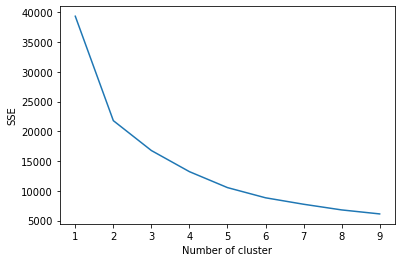

In [123]:
#Elbow Criterion Method:

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [108]:
#Silhouette Coefficient

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(X, label, metric='euclidean')
    print("Para n_clusters={}, o coeficiente de  Silhouette {}".format(k, sil_coeff))

Para n_clusters=2, o coeficiente de  Silhouette 0.37686260181425646
Para n_clusters=3, o coeficiente de  Silhouette 0.33747665580946734
Para n_clusters=4, o coeficiente de  Silhouette 0.34323894977576824
Para n_clusters=5, o coeficiente de  Silhouette 0.3637344187236443
Para n_clusters=6, o coeficiente de  Silhouette 0.36123560726419635
Para n_clusters=7, o coeficiente de  Silhouette 0.3707211773611405
Para n_clusters=8, o coeficiente de  Silhouette 0.3792899467904055
Para n_clusters=9, o coeficiente de  Silhouette 0.37572398489587894
Para n_clusters=10, o coeficiente de  Silhouette 0.3868754208935515
